# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [193]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD,DMDc,DMDBase
from datetime import timedelta, date, datetime
import re 
from urllib.request import urlopen
import json
import plotly.express as px
plt.rcParams['text.color'] = 'white'
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                    'xtick.color' : "white",
                    'ytick.color' : "white"})

In [194]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [195]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()
threshold = 2; # threshold for minimum number of days cutoff

In [196]:
start_date = date(2020, 1, 22)
end_date = date(2020, 1, 31)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold): #for threshold
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False): #for threshold
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [197]:
start_date = date(2020, 2, 1)
end_date = date(2020, 3, 9)

for single_date in pd.date_range(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            if (np.transpose(rowSum).Confirmed.all()>=threshold):
                newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)

In [198]:
start_date = date(2020, 3, 10)
end_date = date(2020, 3, 21)

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if (totalInState.empty == False):
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    if (newStateData.empty == False):
        newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
        stateData = pd.concat([stateData,newStateData],axis=1)


In [199]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

for single_date in pd.date_range(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    try:
        daily = pd.read_csv(url, error_bad_lines=False)
        for state in states:
            totalInState = daily.loc[daily['Province_State'] == state]
            title = totalInState.loc[:,'Province_State':'Province_State']
            if totalInState.empty == False:
                title = title.iloc[[0],:]
                rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
                if (np.transpose(rowSum).Confirmed.all()>=threshold):
                    newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
        if (newStateData.empty == False):
            newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
            stateData = pd.concat([stateData,newStateData],axis=1)
    except:
        print('Todays file has not yet been uploaded')

Todays file has not yet been uploaded


In [200]:
stateData = stateData.fillna(0)
stateData

,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020,03-30-2020,03-31-2020,...,04-11-2020,04-12-2020,04-13-2020,04-14-2020,04-15-2020,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,157,196,242,381,517,587,694,825,899,987,...,3217,3563,3734,3953,4075,4345,4571,4712,4888,5079
Alaska,20,30,34,41,56,58,85,102,114,119,...,257,272,277,285,293,300,309,314,319,321
Arizona,152,235,326,401,508,665,773,919,1157,1289,...,3393,3542,3705,3809,3964,4237,4511,4724,4933,5068
Arkansas,165,192,219,280,335,381,409,426,473,523,...,1228,1280,1410,1498,1569,1620,1695,1744,1781,1973
California,1646,2108,2538,2998,3899,4657,5095,5852,7138,8210,...,21706,22795,23931,25356,26686,27677,29157,30491,31431,33686
Colorado,591,704,723,1021,1430,1433,1740,2307,2311,2966,...,6513,7307,7691,7950,7956,8286,8691,9047,9730,9730
Connecticut,327,415,618,875,1012,1291,1524,1993,2571,3128,...,11510,12035,13381,13989,14755,15884,16809,17550,17962,19815
Delaware,56,68,104,119,130,163,214,232,264,319,...,1479,1625,1758,1926,2014,2070,2317,2538,2538,2745
Florida,1004,1227,1412,1682,2357,2900,3763,4246,5473,6741,...,18494,19895,21019,21628,22511,23343,24759,25492,26314,27059


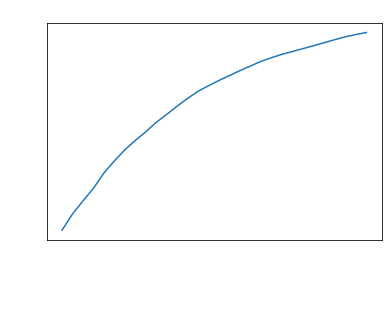

In [201]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

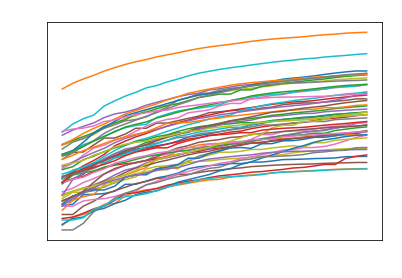

In [202]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(np.transpose(stateData.loc[:,'01-22-2020':]))

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')


plt.show()

## Convert Data into an Array

In order to make most initial conditions greater than zero, the start date was chosen to be that in which all states reach an indicated threshold.  This will increase the accuracy of the reconstruction in time.

In [299]:
# Select data with few initial conditions of 0
scaledData = stateData
# Convert data to array
scaledData = scaledData.to_numpy()
scaledData

array([[ 157,  196,  242, ..., 4712, 4888, 5079],
       [  20,   30,   34, ...,  314,  319,  321],
       [ 152,  235,  326, ..., 4724, 4933, 5068],
       ...,
       [  16,   16,   22, ...,  785,  890,  902],
       [ 381,  425,  481, ..., 4199, 4346, 4499],
       [  26,   26,   29, ...,  309,  313,  317]], dtype=int64)

## Take DMD

**Modes**: Columns are the low-rank structures individuated


**Dynamics**: Rows refer to the time evolution of each mode


**Eigs**: eigenvalues of the low dimensional operator

* If an eigenvalue is on the unit circle, the corresponding mode will be stable; while if an eigenvalue is inside or outside the unit circle, the mode will converge or diverge, respectively.

**Reconstructed_data**: the approximated system evolution

### DMD

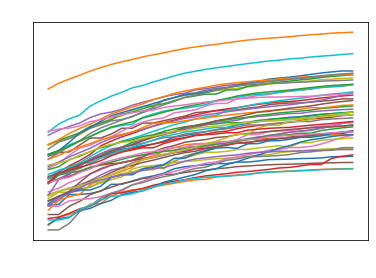

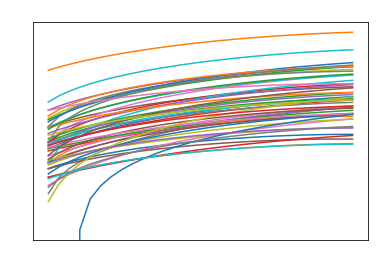

In [300]:
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData)

# plot true data
plt.title('True Confirmed Cases')
plt.plot(scaledData.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

# plot dmd reconstructed data
plt.title('DMD Reconstructed Confirmed Cases')
plt.plot(dmd.reconstructed_data.real.T)
plt.xlabel('Time / days')
plt.yscale('log')
plt.show()

Eigenvalue (1.0667603292971026+0j): distance from unit circle 0.13797760016206273
Eigenvalue (1.0006506536722561+0.1288846439188924j): distance from unit circle 0.017912982132813005
Eigenvalue (1.0006506536722561-0.1288846439188924j): distance from unit circle 0.017912982132813005


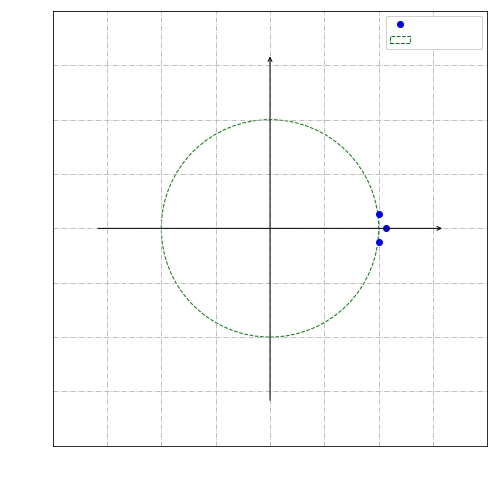

In [333]:
# eigenvalues of low dim operator

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

The eigenvalues are discrete, so their placement corresponds to the time sequences below:

![title](img/rootLocusPoleLocations.PNG)

All eigenvalues inside of the unit circle converge to a final value, while the eigenvalues outside of the unit circle are unstable (do not converge).  The unstable eigenvalues correspond to unstable modes.  Most eigenvalues are located on the positive real axis, corresponding to low frequency dynamics.

Eigenvalue 0.06462632599864523, 0.0
Eigenvalue 0.008877217616960503, 0.1280955919882464
Eigenvalue 0.008877217616960503, -0.1280955919882464


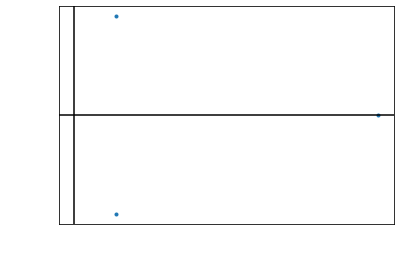

In [334]:
# Continuous Eigenvalues

plt.plot(np.log(dmd.eigs).real,np.log(dmd.eigs).imag,'.')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('Real')
plt.ylabel('Imaginary')

for eig in dmd.eigs:
    print('Eigenvalue {}, {}'.format(np.log(eig).real, np.log(eig).imag))

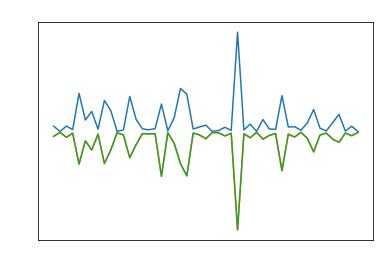

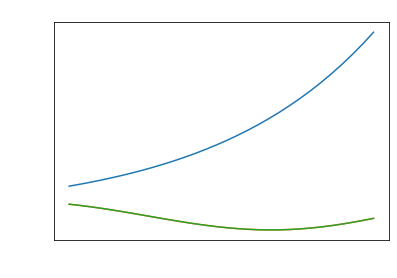

In [335]:
# modes
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
    plt.xlabel('States')
plt.show()

# dynamics
for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title('Dynamics')
    plt.xlabel('Time / days')
plt.show()

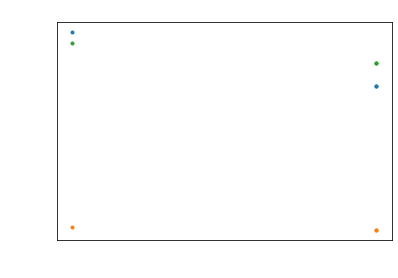

In [336]:
# Mode Selection

# Continuous Time Oscillatory Frequency for 24 hour period (units 1/h)
freq = (np.log(dmd.eigs)).imag/(2*np.pi)

i = 0
for eig in dmd.eigs:
    plt.plot(abs(freq),(abs(dmd.modes.real*eig))[i,:],'.')
    i+=1
plt.title('Mode Selection')
plt.xlabel('Frequency / 1/day')
plt.ylabel('Eigenvalue * Modes')
plt.show()


In [305]:
# Modes map

dmd = DMD(svd_rank=1)
dmd.fit(scaledData) # transpose so snapshots (state data) are arranged by column


with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
df = dynamic.real
fig = px.choropleth(df,    locations=statesA,  
                           locationmode="USA-states",
                           color=abs(dmd.modes.real),
                           range_color=(0,0.9),
                           scope="usa",
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Predict

1. Reduce data from last time step using dynamic modes:
$$
\mathbf{x}_k^{\sim} = U^{+}\mathbf{x}_k
$$

2. Use previous reduced data time step to get the next reduced data array:
$$
\mathbf{x}_{k+1}^{\sim} = \mathbf{A}\mathbf{x}_k^{\sim} 
$$

3. Multiply the reduced data by the modes to obtain the predicted data array:
$$
\mathbf{x}_{k} = \mathbf{U}\mathbf{x}_k^{\sim} 
$$

In [306]:
# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData)

At = dmd.atilde #Koopman operator


In [315]:
# compute reduced data prediction and actual data prediction

# Intialize
days = 35 # number of days in the future to predict
x = np.zeros((len(scaledData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning:

Casting complex values to real discards the imaginary part



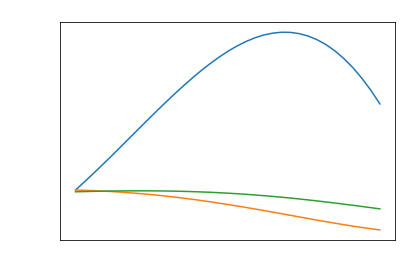

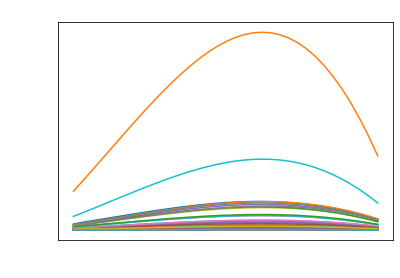

In [316]:
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order)')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.show()

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



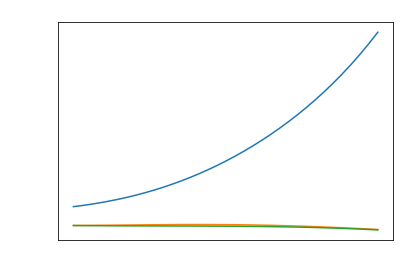

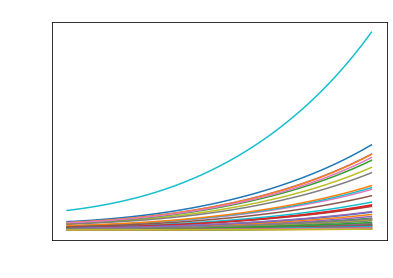

In [341]:
sData = stateData.drop(['New York']).to_numpy()

# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(sData)

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
days = 35 # number of days in the future to predict
x = np.zeros((len(sData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = sData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),sData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order) without NY')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases without NY')
plt.xlabel('Time / days')
plt.show()

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



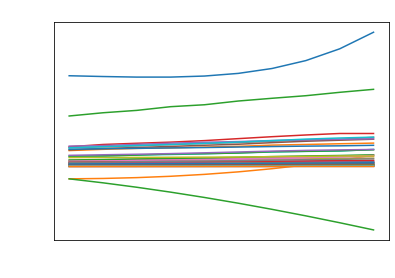

In [338]:
# Take DMD of data
days = 10 # number of days in the future to predict
testDays = np.size(sData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(sData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(sData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = sData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),sData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.plot(xt.T)
plt.plot(sData[:,testDays:].T)
plt.title('DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.show()

In [340]:
['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-sData[:,i+testDays]))/np.mean(sData[:,i+testDays])*100,np.std(np.abs(x[:,i]-sData[:,i+testDays]))/np.std(sData[:,i+testDays])*100) for i in range(days)]

['Predicted Day 1: Mean Error 53.80967537530259 %, Standard Deviation of Error +/-53.09255320405415 %',
 'Predicted Day 2: Mean Error 49.36693889756923 %, Standard Deviation of Error +/-45.92462119567692 %',
 'Predicted Day 3: Mean Error 45.099325027293915 %, Standard Deviation of Error +/-43.14313162318874 %',
 'Predicted Day 4: Mean Error 41.53650587824112 %, Standard Deviation of Error +/-39.54408630214723 %',
 'Predicted Day 5: Mean Error 40.22672347396864 %, Standard Deviation of Error +/-39.51751355070538 %',
 'Predicted Day 6: Mean Error 39.125748148157854 %, Standard Deviation of Error +/-38.92478636091404 %',
 'Predicted Day 7: Mean Error 39.503231720740814 %, Standard Deviation of Error +/-40.550217423113466 %',
 'Predicted Day 8: Mean Error 43.455765587069884 %, Standard Deviation of Error +/-45.23363859330096 %',
 'Predicted Day 9: Mean Error 50.51624812191069 %, Standard Deviation of Error +/-52.002596171104564 %',
 'Predicted Day 10: Mean Error 61.29287540909439 %, Standa

#### Testing prediction accuracy:

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



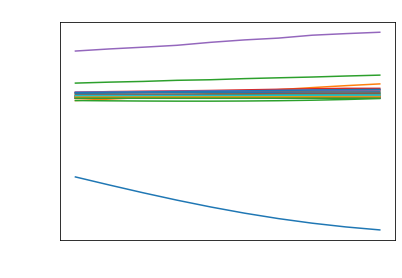

In [323]:
# Take DMD of data
days = 10 # number of days in the future to predict
testDays = np.size(scaledData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(scaledData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(scaledData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = scaledData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),scaledData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.plot(xt.T)
plt.plot(scaledData[:,testDays:].T)
plt.title('DMD Predicted Confirmed Cases')
plt.xlabel('Time / days')
plt.show()



In [324]:
['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-scaledData[:,i+testDays]))/np.mean(scaledData[:,i+testDays])*100,np.std(np.abs(x[:,i]-scaledData[:,i+testDays]))/np.std(scaledData[:,i+testDays])*100) for i in range(days)]

['Predicted Day 1: Mean Error 48.962239461453386 %, Standard Deviation of Error +/-41.535422956618305 %',
 'Predicted Day 2: Mean Error 37.909025102140795 %, Standard Deviation of Error +/-56.07260265175237 %',
 'Predicted Day 3: Mean Error 46.31503591523944 %, Standard Deviation of Error +/-66.7947071213568 %',
 'Predicted Day 4: Mean Error 53.3742620340255 %, Standard Deviation of Error +/-75.93022783078445 %',
 'Predicted Day 5: Mean Error 59.06759922673176 %, Standard Deviation of Error +/-80.9254534500473 %',
 'Predicted Day 6: Mean Error 63.03735325090648 %, Standard Deviation of Error +/-86.21316848357526 %',
 'Predicted Day 7: Mean Error 65.79266562728253 %, Standard Deviation of Error +/-92.09408387591725 %',
 'Predicted Day 8: Mean Error 67.38249890510374 %, Standard Deviation of Error +/-93.63734520858594 %',
 'Predicted Day 9: Mean Error 69.21387290344164 %, Standard Deviation of Error +/-97.52620034305231 %',
 'Predicted Day 10: Mean Error 70.44807366493781 %, Standard Dev

Predictions are only valid for about 10 days.  The highest accuracy predictions occur at an svd rank of 3.

#### Testing prediction accuracy for the data set excluding NY

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: ComplexWarning:

Casting complex values to real discards the imaginary part



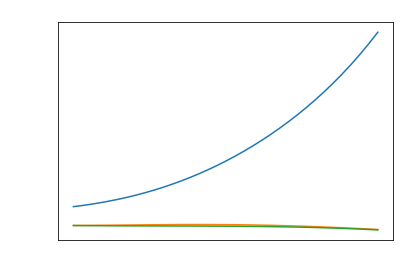

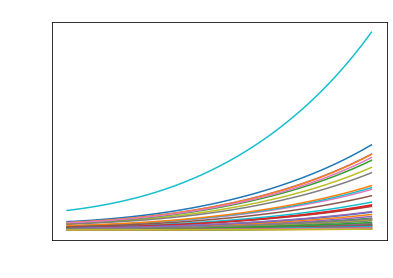

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: ComplexWarning:

Casting complex values to real discards the imaginary part



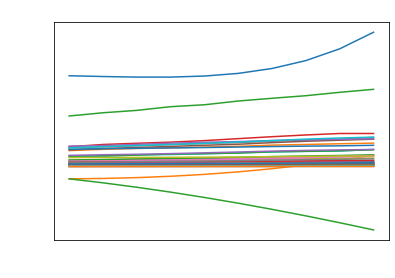

['Predicted Day 1: Mean Error 53.80967537530259 %, Standard Deviation of Error +/-53.09255320405415 %',
 'Predicted Day 2: Mean Error 49.36693889756923 %, Standard Deviation of Error +/-45.92462119567692 %',
 'Predicted Day 3: Mean Error 45.099325027293915 %, Standard Deviation of Error +/-43.14313162318874 %',
 'Predicted Day 4: Mean Error 41.53650587824112 %, Standard Deviation of Error +/-39.54408630214723 %',
 'Predicted Day 5: Mean Error 40.22672347396864 %, Standard Deviation of Error +/-39.51751355070538 %',
 'Predicted Day 6: Mean Error 39.125748148157854 %, Standard Deviation of Error +/-38.92478636091404 %',
 'Predicted Day 7: Mean Error 39.503231720740814 %, Standard Deviation of Error +/-40.550217423113466 %',
 'Predicted Day 8: Mean Error 43.455765587069884 %, Standard Deviation of Error +/-45.23363859330096 %',
 'Predicted Day 9: Mean Error 50.51624812191069 %, Standard Deviation of Error +/-52.002596171104564 %',
 'Predicted Day 10: Mean Error 61.29287540909439 %, Standa

In [343]:
sData = stateData.drop(['New York']).to_numpy()

# Take DMD of data
dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(sData)

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
days = 35 # number of days in the future to predict
x = np.zeros((len(sData[:,-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = sData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),sData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
# Plot predicted cases
plt.plot(xt.T)
plt.title('DMD Predicted Confirmed Cases (Reduced Order) without NY')
plt.xlabel('Time / days')
plt.show()

plt.plot(x.T)
plt.title('DMD Predicted Confirmed Cases without NY')
plt.xlabel('Time / days')
plt.show()

# Take DMD of data
days = 10 # number of days in the future to predict
testDays = np.size(sData,1)-days

dmd = DMD(svd_rank=3) # truncated SVD
dmd.fit(sData[:,:testDays]) # fit for selected days

At = dmd.atilde #Koopman operator

# compute reduced data prediction and actual data prediction

# Intialize
x = np.zeros((len(sData[:,testDays*-1]),days)) # actual prediction
xt = np.zeros((len(At),days)) # reduced prediction
x[:,0] = sData[:,-1]
xt[:,0] = np.matmul(np.linalg.pinv(dmd.modes),sData[:,-1])

# Iterate to produce actual and reduced predictions
for i in range(1,days):
    xt[:,i] = np.matmul(At,xt[:,i-1])
    x[:,i] = np.matmul(dmd.modes,xt[:,i])
    
plt.plot(xt.T)
plt.plot(sData[:,testDays:].T)
plt.title('DMD Predicted Confirmed Cases without NY')
plt.xlabel('Time / days')
plt.show()

['Predicted Day {}: Mean Error {} %, Standard Deviation of Error +/-{} %'.format(i+1,np.mean(np.abs(x[:,i]-sData[:,i+testDays]))/np.mean(sData[:,i+testDays])*100,np.std(np.abs(x[:,i]-sData[:,i+testDays]))/np.std(sData[:,i+testDays])*100) for i in range(days)]

The standard deviation for error signficantly improves when excluding NY.

### DMDc: DMD with Control

Since we want to add the control, the evolution of the complex system can be formally summarized as:$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$where the operators $\mathbf{A}$ and $\mathbf{B}$ are the ones we will approximate using DMD.

In [325]:
dmdc = DMDc()
dmdc.fit(scaledData, np.zeros(np.size(scaledData,1)-1)) # fit dmdc with no control

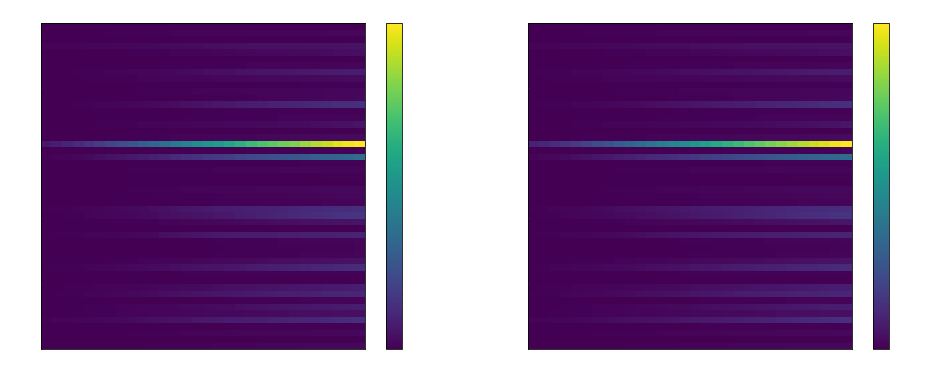

In [326]:
# plot

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.title('Original system')
plt.xlabel('Time / days')
plt.ylabel('States')
plt.pcolor(scaledData)
plt.colorbar()

plt.subplot(122)
plt.title('Reconstructed system')
plt.ylabel('States')
plt.xlabel('Time / days')
plt.pcolor(dmdc.reconstructed_data().real)
plt.colorbar()

plt.show()

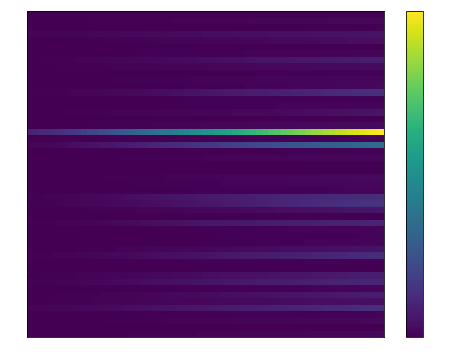

In [327]:
dmdc.dmd_time['dt'] = .5
u = np.random.rand(1,1)-.5
new_u = np.random.rand(u.shape[0], dmdc.dynamics.shape[1]-1)

plt.figure(figsize=(8,6))
plt.pcolor(dmdc.reconstructed_data(new_u).real)
plt.colorbar()
plt.show()